In [3]:
import matplotlib.pyplot as plt
from matplotlib.cm import coolwarm
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numpy as np
import pandas as pd
import os
import seaborn

In [37]:
def read_data(path, Nx, Ny):
    global index
    with open(path+str(index)+".bin", "rb") as f:
        data = np.fromfile(f).reshape(Ny, Nx)
    index += 1
    return data

# ===============================

dir_path = "../../output/multi_matrix/"
index = 0

# exec_info = pd.read_csv(dir_path + "exec_info.csv", sep=",")
# Nx, Ny, n_files = exec_info["Nx"].iloc[0], exec_info["Ny"].iloc[0], exec_info["n_files"].iloc[0]
# a, b = exec_info["a"].iloc[0], exec_info["b"].iloc[0]

Nx, Ny, n_files = 800, 800, 19
a, b = 10, 10

In [38]:
data = read_data(dir_path, Nx, Ny)  
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(800, 800))

=-=-=-=-=-=-=-=-=-=-= Start of Figure Processing =-=-=-=-=-=-=-=-=-=-=
1/17
1/17
2/17
3/17
4/17
5/17
6/17
7/17
8/17
9/17
10/17
11/17
12/17
13/17
14/17
15/17
16/17
17/17
=-=-=-=-=-=-=-=-=-=-= End of Figure Processing =-=-=-=-=-=-=-=-=-=-=
1/17


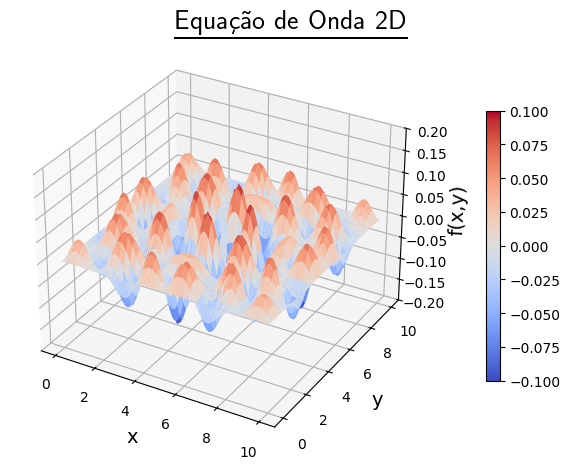

In [39]:
index = 0

x = np.linspace(0, a, Nx)
y = np.linspace(0, b, Ny)
xv, yv = np.meshgrid(x, y)

plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"})

z_lim = [-0.2, 0.2]

data = read_data(dir_path, Nx, Ny)  

ax.set_zlim(z_lim[0], z_lim[1])

plot = [ax.plot_surface(xv, yv, data, cmap="coolwarm", vmin=z_lim[0]/2, vmax=z_lim[1]/2)]
fig.colorbar(plot[0], shrink=0.65, pad=0.1)

ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.set_zlabel("f(x,y)", fontsize=14)
plt.title(r"\underline{Equação de Onda 2D}", usetex=True, fontsize=20, x=0.675)

print("=-=-=-=-=-=-=-=-=-=-= Start of Figure Processing =-=-=-=-=-=-=-=-=-=-=")

def animate(i, Z_time, plot, z_lim):
    print(f"{i+1}/{n_files-2}")
    data = read_data(dir_path, Nx, Ny)
    
    plot[0].remove()
    plot[0] = ax.plot_surface(xv, yv, data, cmap="coolwarm", vmin=z_lim[0]/2, vmax=z_lim[1]/2)
    # plt.savefig(f"figures/frames/frame-{i}.png", dpi=500)

frames = n_files-2
ani = animation.FuncAnimation(fig, animate, frames=frames, fargs=(data, plot, z_lim), repeat=True)
ani.save("../../figures/figure.gif", writer="pillow", fps=16, dpi=200)

print("=-=-=-=-=-=-=-=-=-=-= End of Figure Processing =-=-=-=-=-=-=-=-=-=-=")
